# Symbolic description of the system through perturbative approach.

We hereby define the following system :

$$ \partial_t \hat{S} = \gamma \hat{S} \wedge \vec{B} - \Gamma \hat{S} + R_{op} (S_0 - \hat{S})$$

with :
- $\hat{S} = \hat{S}_{ss} + \delta \hat{S}$
- $\vec{B}_{ss} = (0,B_0,0), \vec{\delta B} = (0,0,\delta B_1), \vec{B} = \vec{B}+ \vec{\delta B}$
- $\Gamma$ : relaxation rate
- $R_{op} = \sigma_{abs}\phi_{opt}$ : pumping rate
- $S_0$ : the maximum polarization of our spin in the case of no magnetic field and relaxation

We write the equation with the steady state equation and the perturbation

The steady state equation is the solution of the following system:

$$\partial_t S_{ss} = \begin{pmatrix} -\gamma B_0 S_z \\ 0 \\ \gamma B_0 S_x \end{pmatrix} - \Gamma S_{ss} + R_{op} (S_0\hat{z} - S_{ss})$$

Now our total equation becomes the following :

$$\partial_t S_{ss} + \partial_t \delta S = \gamma \begin{pmatrix} S_x + \delta S_x \\ S_y + \delta S_y \\ S_z + \delta S_z \end{pmatrix} \wedge \begin{pmatrix} 0 \\ B_0 \\ \delta B_1(t) \end{pmatrix} - \Gamma S+\delta S + R_{op} (S_0\hat{z} - S+\delta S)$$

### Steady state solution :
$$\partial_t S_{ss} = 0$$

$$\begin{cases} - \gamma B_0 S_z - \Gamma S_x - R_{op} S_x = 0  \\
 -(\Gamma + R_{op}) S_y = 0 \\
 \gamma B_0 S_x - \Gamma S_z + R_{op}(S_0 - S_z) = 0  \end{cases}$$

Leading to the steady state solutions:

$$\begin{cases} S_x = -\frac{R_{op}S_0 \gamma B_0}{(\gamma B_0)^2 - (\Gamma+R_{op})^2} \\
S_y = 0 \\
S_z = \frac{(\Gamma+R_{op})R_{op}S_0}{(\gamma B_0)^2 - (\Gamma+R_{op})^2} \end{cases}$$

### Perturbative solutions

We now have the following system :

$$\partial_t S_{ss} + \partial_t \delta S = \begin{pmatrix} (S_y + \delta S_y) \delta B_1 - (S_z + \delta S_z) B_0 \\
                                                            -(S_x + \delta S_x) \delta B_1(t) \\
                                                            (S_x + \delta S_x) B_0 
                                            \end{pmatrix}
                                            - \Gamma (S_{ss} + \delta S) + R_{op} (S_0 \hat{z} - S+\delta S)$$

We assume that the product of two $\delta$ leads to 0, and that $\partial_t S_{ss} = 0$, and already know that $S_y = 0$, remove the terms that are exactly the same as the ones of the steady state equation and we thus get :

$$ \begin{cases} \partial_t \delta S_x = -  \delta S_z B_0 - \Gamma \delta S_x - R_{op} \delta S_x\\
                \partial_t \delta S_y = -\gamma \delta B_1(t) S_x - \Gamma \delta S_y - R_{op} \delta S_y\\
                \partial_t \delta S_z = \gamma B_0 \delta S_x - \Gamma \delta S_z - R_{op} (S_0 - \delta S_z) \end{cases}$$

We suppose a solution of the type $\delta S_i(t) = \delta S_i e^{-i\omega t}$ and its time derivative $\partial_t \delta S_i(t) = -i\omega t \delta S e^{-i\omega t}$.
The exponential appearing everywhere except in the term $-\gamma \delta B_1 S_x$, we can remove it and just add the complex exponential to this one term, giving us the following system :

$$ \begin{cases} -i \omega \delta S_x = -  \delta S_z B_0 - \Gamma \delta S_x - R_{op} \delta S_x\\
                -i \omega \delta S_y = -\gamma \delta B_1(t) S_x e^{i \omega t} - \Gamma \delta S_y - R_{op} \delta S_y\\
                -i \omega \delta S_z = \gamma B_0 \delta S_x - \Gamma \delta S_z - R_{op} (S_0 - \delta S_z) \end{cases}$$

Since $\delta B_1 = \delta B_1 \cos(\omega_{rf} t)$, we have $\delta \frac{B_1}{2} (e^{-i \omega_{rf} t} + e^{i \omega_{rf} t}) e^{i\omega t}$
We assume that $\omega_{rf} \approx \omega$, such that the term $e^{i (\omega_{rf}+\omega)t}$ is assumed as fast oscillating and averaged to 0. We will note $\omega - \omega_{rf} = \Delta \omega$

Our final system is thus :

$$ \begin{cases} -i \omega \delta S_x = -  \delta S_z B_0 - \Gamma \delta S_x - R_{op} \delta S_x\\
                -i \omega \delta S_y = -\gamma \tfrac{\delta B_1}{2} S_x e^{i \Delta \omega t} - \Gamma \delta S_y - R_{op} \delta S_y\\
                -i \omega \delta S_z = \gamma B_0 \delta S_x - \Gamma \delta S_z - R_{op} (S_0 - \delta S_z) \end{cases}$$

Out of laziness, we enter this system in the following sympy solver:

In [1]:
import sympy
from sympy import symbols, Eq, solve, I

def solve_system_symbolically():
    # Define parameters (symbolic). 
    # We allow them to be complex=True because of the i*w terms,
    # but you may restrict some to real if you prefer.
    w, gamma, B0 = symbols('w gamma B0', complex=True)
    delta, B1 = symbols('delta B1', complex=True)
    Sx = sympy.Symbol('Sx', complex=True)  # 'Sx' is treated as a parameter here
    Gamma_ = sympy.Symbol('Gamma', complex=True)
    R_op = sympy.Symbol('R_op', complex=True)
    S0 = sympy.Symbol('S0', complex=True)
    
    # Define the unknowns x, y, z (potentially complex)
    x, y, z = symbols('x y z', complex=True)
    
    # The system from the image, rewritten so that each equation = 0:
    #
    # 1) -i w x = - gamma * z * B0 - Gamma * x - R_op * x
    #    --> -i w x + gamma B0 z + (Gamma + R_op) x = 0
    eq1 = Eq(-I*w*x + gamma*B0*z + (Gamma_ + R_op)*x, 0)
    
    # 2) -i w y = - delta * B1 * Sx - Gamma * y - R_op * y
    #    --> -i w y + delta B1 Sx + (Gamma + R_op) y = 0
    eq2 = Eq(-I*w*y + gamma*B1*Sx + (Gamma_ + R_op)*y, 0)
    
    # 3) -i w z = gamma * B0 * x - Gamma * z + R_op (S0 - z)
    #    --> -i w z - gamma B0 x + (Gamma + R_op) z - R_op * S0 = 0
    eq3 = Eq(-I*w*z - gamma*B0*x + (Gamma_ + R_op)*z - R_op*S0, 0)
    
    # Solve for x, y, z symbolically
    sol = solve([eq1, eq2, eq3], [x, y, z], dict=True)
    
    # Print the solution(s)
    print("Solution(s) for x, y, z:")
    for i, s in enumerate(sol, 1):
        print(f"  Solution {i}:")
        print(f"    x = {s[x]}")
        print(f"    y = {s[y]}")
        print(f"    z = {s[z]}")

if __name__ == "__main__":
    solve_system_symbolically()

Solution(s) for x, y, z:
  Solution 1:
    x = B0*R_op*S0*gamma/(-B0**2*gamma**2 - Gamma**2 - 2*Gamma*R_op + 2*I*Gamma*w - R_op**2 + 2*I*R_op*w + w**2)
    y = -I*B1*Sx*gamma/(I*Gamma + I*R_op + w)
    z = (-Gamma*R_op*S0 - R_op**2*S0 + I*R_op*S0*w)/(-B0**2*gamma**2 - Gamma**2 - 2*Gamma*R_op + 2*I*Gamma*w - R_op**2 + 2*I*R_op*w + w**2)


Which translated back to latex gives us:

$$\begin{cases}
\delta S_x = \frac{B_0\, R_{\text{op}}\, S_0\, \gamma}
{\,-B_0^{2}\,\gamma^{2} \;-\; \Gamma^{2} \;-\; 2\,\Gamma\,R_{\text{op}} \;+\; 2\,\mathrm{i}\,\Gamma\,\omega \;-\; R_{\text{op}}^{2} \;+\; 2\,\mathrm{i}\,R_{\text{op}}\,\omega \;+\; \omega^{2}} \\

\delta S_y = \frac{-\,\mathrm{i}\,\delta B_1\,S_x\,}
{\mathrm{i}\,\Gamma \;+\; \mathrm{i}\,R_{\text{op}} \;+\; \omega} \\

\delta S_z = \frac{-\,\Gamma\,R_{\text{op}}\,S_0 \;-\; R_{\text{op}}^{2}\,S_0 \;+\; \mathrm{i}\,R_{\text{op}}\,S_0\,\omega}
{\,-B_0^{2}\,\gamma^{2} \;-\; \Gamma^{2} \;-\; 2\,\Gamma\,R_{\text{op}} \;+\; 2\,\mathrm{i}\,\Gamma\,\omega \;-\; R_{\text{op}}^{2} \;+\; 2\,\mathrm{i}\,R_{\text{op}}\,\omega \;+\; \omega^{2}} \end{cases}
$$


Once factorized and using $\omega_0 = \gamma B_0$: 

$$\begin{cases} 
\delta S_x = \frac{\omega_0 R_{op}S_0}{(\Gamma+R_{op}+i\omega)^2 - \omega_0^2} \\
\delta S_y = \frac{\frac{\delta B_1}{2} S_x}{-(\Gamma + R_{op}) + i\omega} \\
\delta S_z = \frac{-\Gamma - R_{op} + i \omega}{(\Gamma+R_{op}+i\omega)^2 - \omega_0^2} R_{op}S_0
\end{cases}
$$

injecting $S_x$ into $\delta S_y$, we get:

$$
\delta S_y = -\frac{\delta B_1}{2}\, e^{i \Delta \omega t}\, \frac{R_{op} S_0 \omega_0}{\left[(\omega_0)^2 - (\Gamma + R_{op})^2\right] \left[i\omega - (\Gamma + R_{op})\right]}.
$$

Finally, the general solutions of our system are :

$$\begin{cases}

S_{x,g} = S_x + \delta S_x = -\frac{R_{op}S_0 \omega_0}{(\omega_0)^2 - (\Gamma+R_{op})^2} + \frac{\omega_0 R_{op}S_0}{(\Gamma+R_{op}+i\omega)^2 - \omega_0^2} \\
S_{y,g} = S_y + \delta S_y = -\frac{\delta B_1}{2}\, e^{i \Delta \omega t}\, \frac{R_{op} S_0 \omega_0}{\left[(\omega_0)^2 - (\Gamma + R_{op})^2\right] \left[i\omega - (\Gamma + R_{op})\right]} \\
S_{z,g} = S_z + \delta S_z = \frac{(\Gamma+R_{op})R_{op}S_0}{(\omega_0)^2 - (\Gamma+R_{op})^2} + \frac{-\Gamma - R_{op} + i \omega}{(\Gamma+R_{op}+i\omega)^2 - \omega_0^2} R_{op}S_0

\end{cases}$$

Adding $\Gamma_{tot} = \Gamma + R_{op}$

$$\begin{cases}
S_{x,g} &= R_{\text{op}}S_0\left[-\frac{\omega_0}{\omega_0^2 - \Gamma_{\text{tot}}^2} + \frac{\omega_0}{\left(\Gamma_{\text{tot}}+i\omega\right)^2-\omega_0^2}\right],\\[1mm]
S_{y,g} &= \frac{\delta B_1}{2}\, e^{i\Delta\omega t}\,\frac{R_{\text{op}}S_0\,\omega_0}{\left(\omega_0^2-\Gamma_{\text{tot}}^2\right)\left(\Gamma_{\text{tot}}-i\omega\right)},\\[1mm]
S_{z,g} &= R_{\text{op}}S_0\left[\frac{\Gamma_{\text{tot}}}{\omega_0^2-\Gamma_{\text{tot}}^2} + \frac{-\Gamma_{\text{tot}}+i\omega}{\left(\Gamma_{\text{tot}}+i\omega\right)^2-\omega_0^2}\right].


\end{cases}$$

## Testing the behavior of the solutions

Plot of $S_z$, $S_y$ and $S_x$ (To be done). The most important here is $S_z$ as it will be the one driving our absorption.

## $S_z$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# Define constants
gamma = 7e9
Gamma = 2000
R_op = 3e6
B0 = 100e-6
B1 = 1e-3
S0 = 1
omega0 = gamma*B0
Gamma_tot = Gamma + R_op
t_fixed = 1
w_fixed_im = Gamma+R_op
w_fixed_re = gamma*B0

In [3]:
def S_zg(Gamma_tot, omega0, R_op, S0, omega):
    term1 = Gamma_tot / (omega0**2 - Gamma_tot**2)
    term2 = (-Gamma_tot + 1j*omega) / (((Gamma_tot + 1j*omega)**2) - omega0**2)
    S_zg = R_op * S0 * (term1 + term2)
    return S_zg

omega = np.linspace(-25*omega0,25*omega0,1000000)

s_zg = []
for w in omega:
    s_zg.append(S_zg(Gamma_tot=Gamma_tot, omega0=omega0, R_op=R_op, S0=S0, omega=w))

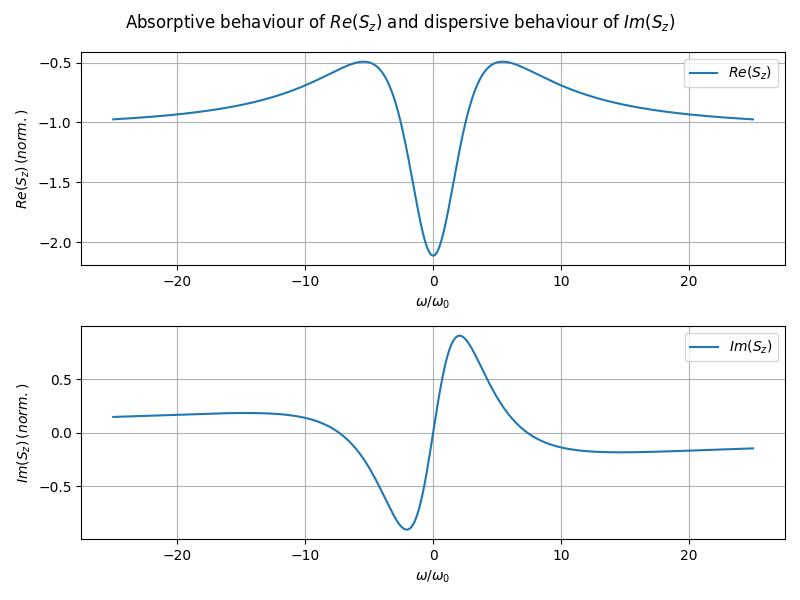

In [4]:
fig,axes = plt.subplots(nrows=2, ncols=1,figsize=(8,6))

fig.suptitle('Absorptive behaviour of $Re(S_z)$ and dispersive behaviour of $Im(S_z)$')

axes[0].plot(omega/omega0,np.real(s_zg), label = '$Re(S_z)$')
axes[0].set_xlabel('$\omega/\omega_0$')
axes[0].set_ylabel('$Re(S_z) \, (norm.)$')
axes[0].legend()
axes[0].grid()

axes[1].plot(omega/omega0,np.imag(s_zg), label = '$Im(S_z)$')
axes[1].set_xlabel('$\omega/\omega_0$')
axes[1].set_ylabel('$Im(S_z) \, (norm.)$')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

## $S_y$

In [5]:
# RF freq
w_vector = np.linspace(0, 1e7, num=10000000)
t_vector = np.linspace(0, 1e-2, num=10000000)
# Compute dSy for ONE frequency at a time
def delta_s_y(gamma,Gamma,B1,B0,S0,Rop,t,w):
    relax = Gamma + Rop
    val = -B1/2*np.exp(1j * (gamma*B0 - w) * t) * Rop*S0*gamma*B0/( ((gamma*B0)**2-(relax)**2) * (1j*w - (relax)) )
    return val
dSy_w_real = []
dSy_w_imag = []
dSy_t_real = []
dSy_t_imag = []

for w_i in w_vector:
    pert_sy_w = delta_s_y(gamma, Gamma, B1, B0, S0, R_op, t_fixed, w_i) 
    dSy_w_real.append(pert_sy_w.real)
    dSy_w_imag.append(pert_sy_w.imag)

for t_i in t_vector:
    pert_sy_time_im = delta_s_y(gamma, Gamma, B1=B1, B0=B0,S0=S0, Rop=R_op, w=w_fixed_im, t=t_i)
    pert_sy_time_re = delta_s_y(gamma, Gamma, B1=B1, B0=B0,S0=S0, Rop=R_op, w=w_fixed_re, t=t_i)
    dSy_t_real.append(pert_sy_time_re)
    dSy_t_imag.append(pert_sy_time_im)

# Convert lists to NumPy arrays
dSy_w_real = np.array(dSy_w_real)
dSy_w_imag = np.array(dSy_w_imag)
dSy_t_real = np.array(dSy_t_real)
dSy_t_imag = np.array(dSy_t_imag)

C:\Users\ma1196605\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\ma1196605\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ma1196605\AppData\Local\Temp\ipykernel_22380\821535704.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\ma1196605\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipympl\backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefi

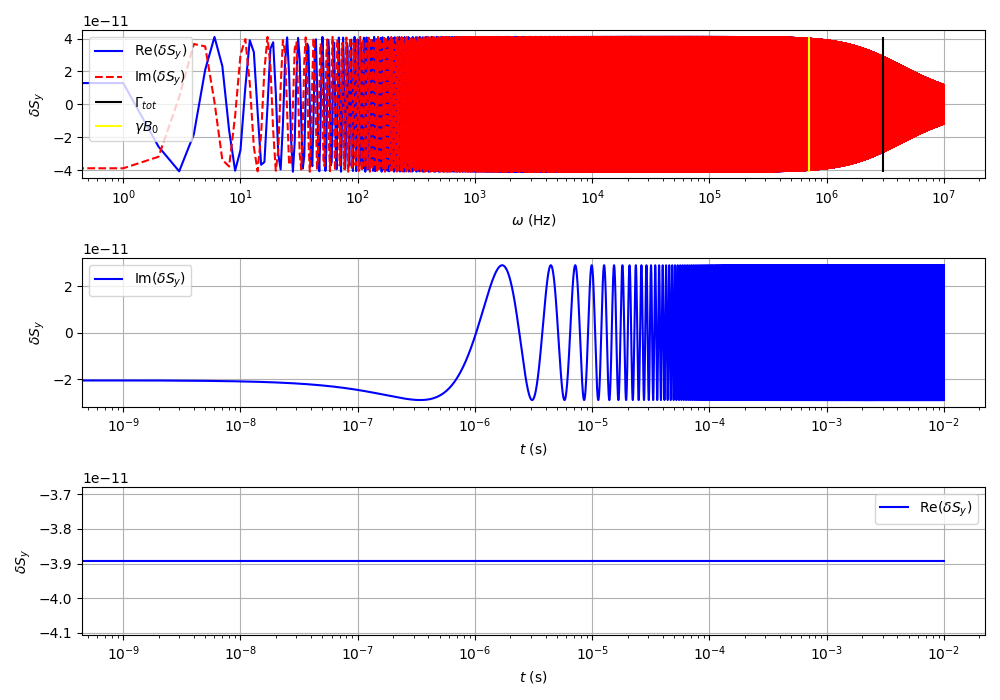

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 7))

# First subplot
axes[0].plot(w_vector, dSy_w_real, label=r"Re$(\delta S_y)$", color="b")
axes[0].plot(w_vector, dSy_w_imag, label=r"Im$(\delta S_y)$", color="r", linestyle="dashed")
axes[0].vlines(x=Gamma+R_op, ymin=min(dSy_w_real), ymax=max(dSy_w_imag), colors='k', label='$\Gamma_{tot}$')
axes[0].vlines(x=gamma*B0, ymin=min(dSy_w_real), ymax=max(dSy_w_imag), colors='yellow', label='$\gamma B_0$')
axes[0].set_xscale('log')
axes[0].set_xlabel("$\omega$ (Hz)")
axes[0].set_ylabel(r"$\delta S_y$")
axes[0].legend()
axes[0].grid()

# Second subplot
axes[1].plot(t_vector, dSy_t_imag, label=r"Im$(\delta S_y)$", color="b")
axes[1].set_xscale('log')
axes[1].set_xlabel("$t$ (s)")
axes[1].set_ylabel(r"$\delta S_y$")
axes[1].legend()
axes[1].grid()

# Third subplot
axes[2].plot(t_vector, dSy_t_real, label=r"Re$(\delta S_y)$", color="b")
axes[2].set_xscale('log')
axes[2].set_xlabel("$t$ (s)")
axes[2].set_ylabel(r"$\delta S_y$")
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()


C:\Users\ma1196605\AppData\Local\Temp\ipykernel_22380\2590082367.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


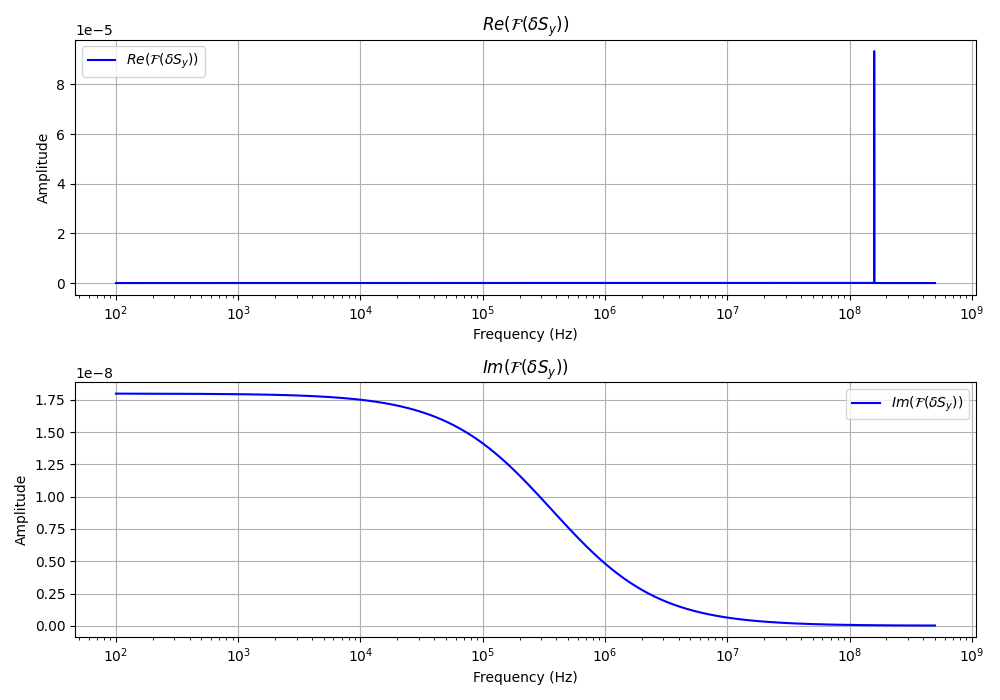

In [7]:
dt = t_vector[1] - t_vector[0]
fs = 1/dt
N = len(t_vector)

fft_signal_real    = np.fft.fftshift(np.fft.fft(dSy_w_real))
fft_signal_imag    = np.fft.fftshift(np.fft.fft(dSy_t_imag))

freq = np.fft.fftfreq(N, d=dt)
freq_centered = np.fft.fftshift(freq)

mid = N // 2
freq_pos            = freq_centered[mid+1:]
fft_signal_real_pos = fft_signal_real[mid+1:]
fft_signal_imag_pos = fft_signal_imag[mid+1:]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

axes[0].plot(freq_pos, np.abs(fft_signal_real_pos), color='b',
             label=r'$Re(\mathcal{F}(\delta S_y))$')
axes[0].set_title(r'$Re(\mathcal{F}(\delta S_y))$')
axes[0].set_xlabel("Frequency (Hz)")
axes[0].set_ylabel("Amplitude")
axes[0].legend()
axes[0].grid(True)
axes[0].set_xscale('log')  

axes[1].plot(freq_pos, np.abs(fft_signal_imag_pos), color='b',
             label=r'$Im(\mathcal{F}(\delta S_y))$')
axes[1].set_title(r'$Im(\mathcal{F}(\delta S_y))$')
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Amplitude")
axes[1].legend()
axes[1].grid(True)
axes[1].set_xscale('log')  

plt.tight_layout()
plt.show()